# Lab Assignment 1

Many U.S. cities, the U.S. federal government, and even other cities and governments abroad have started subscribing to an Open Data policy, because some data should be transparent and available to everyone to use and republish freely, without restrictions from copyright, patents, or other mechanisms of control. After reading their terms of use, in this lab you'll be exploring the City of Chicago's Crime data set, which is part of their Open Data initiative.

1. Start by navigating over to the City of Chicago's Crimes dataset exploration page. It lists crimes from 2001 to the present, but you'll only be targeting Gambling. The city's website itself has hundreds of other datasets you can browse and do machine learning on.
2. Open up the /Module5/assignment1.py starter code, and follow the directions to acquire the dataset and properly set it up.
3. Fill out the doKMeans method to find and plot seven clusters and print out their centroids. These could be places a police officer investigates to check for on-going illegal activities.
4. Re-run your assignment a few times over, looking at your printed and plotted results. Then answer the following questions.

*Note: If Pandas complains about your data, you can use dropna() on any row that has nans in it.*

In [2]:
# import
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.datasets import load_boston

import matplotlib
import matplotlib.pyplot as plt

matplotlib.style.use('ggplot') # Look Pretty

1. Navigate to: https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2
2. In the 'Primary Type' column, click on the 'Menu' button next to the info button,
   and select 'Filter This Column'. It might take a second for the filter option to
   show up, since it has to load the entire list first.
3. Scroll down to 'GAMBLING'
4. Click the light blue 'Export' button next to the 'Filter' button, and select 'Download As CSV'

In [11]:
# TODO: Load your dataset after importing Pandas

dataFile = r'C:\Users\ng35019\Documents\Training\python_for_ds\Module5Clustering\Datasets\Crimes_-_2001_to_present.csv'
df = pd.read_csv(dataFile); df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,4647776,HM172874,02/09/2006 10:29:07 PM,075XX S COLFAX AVE,1661,GAMBLING,GAME/DICE,SIDEWALK,True,False,...,7.0,43.0,19,1194833.0,1855572.0,2006,04/15/2016 08:55:02 AM,41.758607,-87.561511,"(41.758607126, -87.561510616)"
1,4649196,HM157167,02/01/2006 12:30:27 PM,038XX W FERDINAND ST,1661,GAMBLING,GAME/DICE,SIDEWALK,True,False,...,27.0,23.0,19,1150871.0,1903067.0,2006,04/15/2016 08:55:02 AM,41.889909,-87.721389,"(41.889909247, -87.721389051)"
2,4649661,HM159623,02/02/2006 07:02:12 PM,050XX W SUPERIOR ST,1661,GAMBLING,GAME/DICE,SIDEWALK,True,False,...,28.0,25.0,19,1142605.0,1904502.0,2006,04/15/2016 08:55:02 AM,41.894005,-87.751710,"(41.89400481, -87.751710086)"
3,4650448,HM158020,02/01/2006 08:13:00 PM,056XX W WASHINGTON BLVD,1661,GAMBLING,GAME/DICE,RESIDENCE PORCH/HALLWAY,True,False,...,29.0,25.0,19,1138430.0,1900175.0,2006,04/15/2016 08:55:02 AM,41.882208,-87.767149,"(41.882207608, -87.767148598)"
4,4650940,HM156984,02/01/2006 10:10:00 AM,015XX W 72ND ST,1661,GAMBLING,GAME/DICE,SIDEWALK,True,False,...,17.0,67.0,19,1167231.0,1856980.0,2006,04/15/2016 08:55:02 AM,41.763106,-87.662629,"(41.763105901, -87.66262925)"
5,4651151,HM161364,02/03/2006 04:40:00 PM,001XX N LATROBE AVE,1661,GAMBLING,GAME/DICE,SIDEWALK,True,False,...,28.0,25.0,19,1141360.0,1900477.0,2006,04/15/2016 08:55:02 AM,41.882983,-87.756382,"(41.882982785, -87.756382024)"
6,4656683,HM161437,02/03/2006 04:30:00 PM,002XX W ALEXANDER ST,1651,GAMBLING,GAME/CARDS,OTHER,True,False,...,25.0,34.0,19,1174969.0,1889230.0,2006,04/15/2016 08:55:02 AM,41.851434,-87.633305,"(41.851433926, -87.633305383)"
7,4656759,HM161911,02/03/2006 08:00:00 PM,044XX N MILWAUKEE AVE,1680,GAMBLING,OTHER,ALLEY,True,False,...,45.0,15.0,19,1141580.0,1928940.0,2006,04/15/2016 08:55:02 AM,41.961084,-87.754869,"(41.961084206, -87.754869118)"
8,4657274,HM159750,02/02/2006 07:30:00 PM,084XX S PULASKI RD,1680,GAMBLING,OTHER,OTHER,True,False,...,18.0,70.0,19,1151210.0,1848126.0,2006,04/15/2016 08:55:02 AM,41.739137,-87.721580,"(41.739136801, -87.721580463)"
9,4657315,HM159804,02/02/2006 06:50:00 PM,049XX W FOSTER AVE,1670,GAMBLING,GAME/AMUSEMENT DEVICE,TAVERN/LIQUOR STORE,True,False,...,45.0,12.0,19,1142277.0,1934118.0,2006,04/15/2016 08:55:02 AM,41.975280,-87.752177,"(41.975280123, -87.752177413)"


In [12]:
# TODO: Drop any ROWs with nans in them

df.dropna(axis=0, inplace=True); df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,4647776,HM172874,02/09/2006 10:29:07 PM,075XX S COLFAX AVE,1661,GAMBLING,GAME/DICE,SIDEWALK,True,False,...,7.0,43.0,19,1194833.0,1855572.0,2006,04/15/2016 08:55:02 AM,41.758607,-87.561511,"(41.758607126, -87.561510616)"
1,4649196,HM157167,02/01/2006 12:30:27 PM,038XX W FERDINAND ST,1661,GAMBLING,GAME/DICE,SIDEWALK,True,False,...,27.0,23.0,19,1150871.0,1903067.0,2006,04/15/2016 08:55:02 AM,41.889909,-87.721389,"(41.889909247, -87.721389051)"
2,4649661,HM159623,02/02/2006 07:02:12 PM,050XX W SUPERIOR ST,1661,GAMBLING,GAME/DICE,SIDEWALK,True,False,...,28.0,25.0,19,1142605.0,1904502.0,2006,04/15/2016 08:55:02 AM,41.894005,-87.751710,"(41.89400481, -87.751710086)"
3,4650448,HM158020,02/01/2006 08:13:00 PM,056XX W WASHINGTON BLVD,1661,GAMBLING,GAME/DICE,RESIDENCE PORCH/HALLWAY,True,False,...,29.0,25.0,19,1138430.0,1900175.0,2006,04/15/2016 08:55:02 AM,41.882208,-87.767149,"(41.882207608, -87.767148598)"
4,4650940,HM156984,02/01/2006 10:10:00 AM,015XX W 72ND ST,1661,GAMBLING,GAME/DICE,SIDEWALK,True,False,...,17.0,67.0,19,1167231.0,1856980.0,2006,04/15/2016 08:55:02 AM,41.763106,-87.662629,"(41.763105901, -87.66262925)"
5,4651151,HM161364,02/03/2006 04:40:00 PM,001XX N LATROBE AVE,1661,GAMBLING,GAME/DICE,SIDEWALK,True,False,...,28.0,25.0,19,1141360.0,1900477.0,2006,04/15/2016 08:55:02 AM,41.882983,-87.756382,"(41.882982785, -87.756382024)"
6,4656683,HM161437,02/03/2006 04:30:00 PM,002XX W ALEXANDER ST,1651,GAMBLING,GAME/CARDS,OTHER,True,False,...,25.0,34.0,19,1174969.0,1889230.0,2006,04/15/2016 08:55:02 AM,41.851434,-87.633305,"(41.851433926, -87.633305383)"
7,4656759,HM161911,02/03/2006 08:00:00 PM,044XX N MILWAUKEE AVE,1680,GAMBLING,OTHER,ALLEY,True,False,...,45.0,15.0,19,1141580.0,1928940.0,2006,04/15/2016 08:55:02 AM,41.961084,-87.754869,"(41.961084206, -87.754869118)"
8,4657274,HM159750,02/02/2006 07:30:00 PM,084XX S PULASKI RD,1680,GAMBLING,OTHER,OTHER,True,False,...,18.0,70.0,19,1151210.0,1848126.0,2006,04/15/2016 08:55:02 AM,41.739137,-87.721580,"(41.739136801, -87.721580463)"
9,4657315,HM159804,02/02/2006 06:50:00 PM,049XX W FOSTER AVE,1670,GAMBLING,GAME/AMUSEMENT DEVICE,TAVERN/LIQUOR STORE,True,False,...,45.0,12.0,19,1142277.0,1934118.0,2006,04/15/2016 08:55:02 AM,41.975280,-87.752177,"(41.975280123, -87.752177413)"


In [13]:
# TODO: Print out the dtypes of your dset

df.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                      int64
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                  int64
Ward                    float64
Community Area          float64
FBI Code                  int64
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

In [14]:
# Coerce the 'Date' feature (which is currently a string object) into real date,
# and confirm by re-printing the dtypes. NOTE: This is a slow process...

df.Date = pd.to_datetime(df.Date); df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,4647776,HM172874,2006-02-09 22:29:07,075XX S COLFAX AVE,1661,GAMBLING,GAME/DICE,SIDEWALK,True,False,...,7.0,43.0,19,1194833.0,1855572.0,2006,04/15/2016 08:55:02 AM,41.758607,-87.561511,"(41.758607126, -87.561510616)"
1,4649196,HM157167,2006-02-01 12:30:27,038XX W FERDINAND ST,1661,GAMBLING,GAME/DICE,SIDEWALK,True,False,...,27.0,23.0,19,1150871.0,1903067.0,2006,04/15/2016 08:55:02 AM,41.889909,-87.721389,"(41.889909247, -87.721389051)"
2,4649661,HM159623,2006-02-02 19:02:12,050XX W SUPERIOR ST,1661,GAMBLING,GAME/DICE,SIDEWALK,True,False,...,28.0,25.0,19,1142605.0,1904502.0,2006,04/15/2016 08:55:02 AM,41.894005,-87.751710,"(41.89400481, -87.751710086)"
3,4650448,HM158020,2006-02-01 20:13:00,056XX W WASHINGTON BLVD,1661,GAMBLING,GAME/DICE,RESIDENCE PORCH/HALLWAY,True,False,...,29.0,25.0,19,1138430.0,1900175.0,2006,04/15/2016 08:55:02 AM,41.882208,-87.767149,"(41.882207608, -87.767148598)"
4,4650940,HM156984,2006-02-01 10:10:00,015XX W 72ND ST,1661,GAMBLING,GAME/DICE,SIDEWALK,True,False,...,17.0,67.0,19,1167231.0,1856980.0,2006,04/15/2016 08:55:02 AM,41.763106,-87.662629,"(41.763105901, -87.66262925)"
5,4651151,HM161364,2006-02-03 16:40:00,001XX N LATROBE AVE,1661,GAMBLING,GAME/DICE,SIDEWALK,True,False,...,28.0,25.0,19,1141360.0,1900477.0,2006,04/15/2016 08:55:02 AM,41.882983,-87.756382,"(41.882982785, -87.756382024)"
6,4656683,HM161437,2006-02-03 16:30:00,002XX W ALEXANDER ST,1651,GAMBLING,GAME/CARDS,OTHER,True,False,...,25.0,34.0,19,1174969.0,1889230.0,2006,04/15/2016 08:55:02 AM,41.851434,-87.633305,"(41.851433926, -87.633305383)"
7,4656759,HM161911,2006-02-03 20:00:00,044XX N MILWAUKEE AVE,1680,GAMBLING,OTHER,ALLEY,True,False,...,45.0,15.0,19,1141580.0,1928940.0,2006,04/15/2016 08:55:02 AM,41.961084,-87.754869,"(41.961084206, -87.754869118)"
8,4657274,HM159750,2006-02-02 19:30:00,084XX S PULASKI RD,1680,GAMBLING,OTHER,OTHER,True,False,...,18.0,70.0,19,1151210.0,1848126.0,2006,04/15/2016 08:55:02 AM,41.739137,-87.721580,"(41.739136801, -87.721580463)"
9,4657315,HM159804,2006-02-02 18:50:00,049XX W FOSTER AVE,1670,GAMBLING,GAME/AMUSEMENT DEVICE,TAVERN/LIQUOR STORE,True,False,...,45.0,12.0,19,1142277.0,1934118.0,2006,04/15/2016 08:55:02 AM,41.975280,-87.752177,"(41.975280123, -87.752177413)"


[[-87.71030832  41.87520937]
 [-87.66480012  41.77591024]
 [-87.58014051  41.75081134]
 [-87.63486358  41.70551209]
 [-87.6190633   41.79185279]
 [-87.68654787  41.98439273]
 [-87.75475745  41.88996756]]


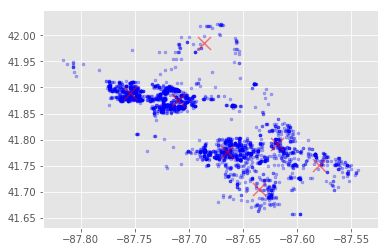

In [28]:
# INFO: Print & Plot your data

def doKMeans(dataframe):
    # INFO: Plot your data with a '.' marker, with 0.3 alpha at the Longitude,
    # and Latitude locations in your dataset. Longitude = x, Latitude = y
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(df.Longitude, df.Latitude, c='b', marker='.', alpha=0.3)

    # TODO: Filter dataframe so that you're only looking at Longitude and Latitude,
    # since the remaining columns aren't really applicable for this purpose.
    dataframe = dataframe[['Longitude','Latitude']]

    # TODO: Use K-Means to try and find seven cluster centers in this dataframe.
    kmeans_model = KMeans(n_clusters=7)
    kmeans_model.fit(dataframe)

    # INFO: Print and plot the centroids...
    centroids = kmeans_model.cluster_centers_
    ax.scatter(centroids[:,0], centroids[:,1], marker='x', c='red', alpha=0.5, linewidths=10, s=169)
    print(centroids)

doKMeans(df)
plt.show()

In [25]:
# TODO: Filter out the data so that it only contains samples that have
# a Date > '2011-01-01', using indexing. Then, in a new figure, plot the
# crime incidents, as well as a new K-Means run's centroids.
df = df[df['Date'] > '2011-01-01']; df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
278,10510010,HZ251574,2016-05-04 19:15:00,057XX S RACINE AVE,1661,GAMBLING,GAME/DICE,PARK PROPERTY,True,False,...,16.0,68.0,19,1169299.0,1866781.0,2016,05/11/2016 03:50:55 PM,41.789957,-87.654766,"(41.78995655, -87.654766198)"
2734,10479729,HZ218796,2016-04-08 23:46:00,036XX N HARLEM AVE,1670,GAMBLING,GAME/AMUSEMENT DEVICE,OTHER,True,False,...,36.0,17.0,19,1127424.0,1923430.0,2016,04/15/2016 09:20:50 AM,41.946215,-87.807039,"(41.946214574, -87.807039472)"
2735,10517943,HZ260064,2016-05-11 11:45:00,054XX W WALTON ST,1661,GAMBLING,GAME/DICE,SIDEWALK,True,False,...,37.0,25.0,19,1139916.0,1905802.0,2016,05/18/2016 03:50:36 PM,41.897622,-87.761554,"(41.897621763, -87.761554236)"
2736,10518836,HZ260859,2016-05-11 21:00:00,034XX W IRVING PARK RD,1670,GAMBLING,GAME/AMUSEMENT DEVICE,OTHER,True,False,...,35.0,16.0,19,1152529.0,1926373.0,2016,05/18/2016 03:50:36 PM,41.953830,-87.714683,"(41.953830299, -87.714682629)"
2737,10520278,HZ262293,2016-05-12 22:45:00,006XX N LOCKWOOD AVE,1661,GAMBLING,GAME/DICE,SIDEWALK,True,False,...,28.0,25.0,19,1140914.0,1903732.0,2016,05/19/2016 03:50:56 PM,41.891923,-87.757940,"(41.891923124, -87.757939633)"
2738,10521084,HZ262951,2016-05-13 13:45:00,048XX W FULTON ST,1661,GAMBLING,GAME/DICE,SIDEWALK,True,False,...,28.0,25.0,19,1144122.0,1901498.0,2016,05/20/2016 03:54:40 PM,41.885733,-87.746214,"(41.885733129, -87.746214056)"
2739,10521262,HZ263338,2016-05-13 18:00:00,015XX E 67TH PL,1661,GAMBLING,GAME/DICE,SIDEWALK,True,False,...,5.0,43.0,19,1187608.0,1860538.0,2016,05/20/2016 03:54:40 PM,41.772409,-87.587832,"(41.772409096, -87.587831537)"
2740,10523160,HZ265957,2016-05-15 20:32:00,056XX S MAY ST,1661,GAMBLING,GAME/DICE,SIDEWALK,True,False,...,16.0,68.0,19,1169613.0,1867420.0,2016,05/22/2016 03:54:30 PM,41.791703,-87.653596,"(41.791703233, -87.653596326)"
2742,10524604,HZ267315,2016-05-16 19:44:00,014XX E 67TH PL,1661,GAMBLING,GAME/DICE,SIDEWALK,True,False,...,5.0,43.0,19,1186955.0,1860524.0,2016,05/23/2016 03:51:11 PM,41.772386,-87.590226,"(41.772386186, -87.590225656)"
2743,10528655,HZ271444,2016-05-19 18:50:00,050XX S ELIZABETH ST,1661,GAMBLING,GAME/DICE,SIDEWALK,True,False,...,16.0,61.0,19,1168843.0,1871376.0,2016,05/26/2016 03:51:03 PM,41.802576,-87.656306,"(41.802575618, -87.656305524)"


[[-87.61876238  41.79213618]
 [-87.75470132  41.8900336 ]
 [-87.6646074   41.77589426]
 [-87.71030832  41.87520937]
 [-87.68609782  41.98513383]
 [-87.63500787  41.70540614]
 [-87.58026093  41.75069923]]


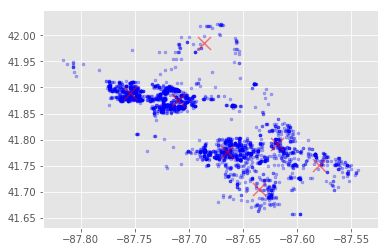

In [42]:
# INFO: Print & Plot your data
doKMeans(df)
plt.show()